# Cholesky selected decomposition examples

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

from sdr.utils import matrix_generation

## 1. Block tridiagonal matrix

before cholesky in place, lower triangular part of A: 
[[4.75315035 0.         0.         0.         0.         0.        ]
 [0.44437467 4.54070957 0.         0.         0.         0.        ]
 [1.32165063 1.08793004 6.40096167 0.         0.         0.        ]
 [0.77136096 0.90571462 0.75609694 7.33153347 0.         0.        ]
 [0.         0.         1.13869064 0.91519733 5.21144418 0.        ]
 [0.         0.         1.48443909 1.81079098 0.87979636 6.48654381]]
after cholesky in place, lower triangular part of A: 
[[2.18017209 0.         0.         0.         0.         0.        ]
 [0.2038255  2.12112346 0.         0.         0.         0.        ]
 [0.6062139  0.45464972 2.41386827 0.         0.         0.        ]
 [0.35380737 0.39299912 0.15035495 2.6512825  0.         0.        ]
 [0.         0.         0.47172858 0.31843857 2.21077208 0.        ]
 [0.         0.         0.61496276 0.64811211 0.17338602 2.37870818]]
L reference
[[2.18017209 0.         0.         0.         0. 

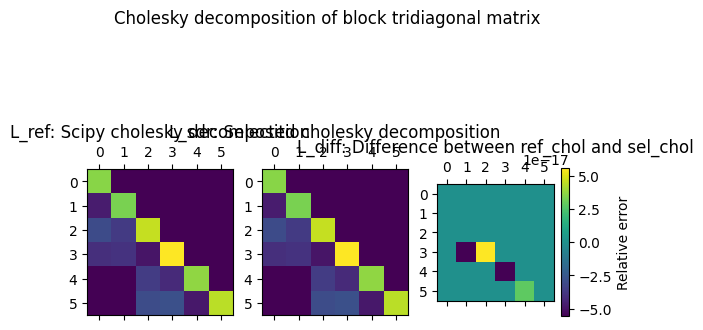

In [8]:
from sdr.cholesky.cholesky_decompose import chol_dcmp_tridiag, chol_dcmp_tridiag_inPlace

nblocks = 3
blocksize = 2
symmetric = True
diagonal_dominant = True
seed = 63

A = matrix_generation.generate_blocktridiag(
    nblocks, blocksize, symmetric, diagonal_dominant, seed
)

A_orig = np.copy(A)

L = chol_dcmp_tridiag(A, blocksize)

print("after cholesky no overwrite, L: ")
print(L)

chol_dcmp_tridiag_inPlace(A, blocksize)

print("after cholesky in place, lower triangular part of A: ")
print(np.tril(A))

L_ref = la.cholesky(A_orig, lower=True)
print("L reference")
print(L_ref)

fig, ax = plt.subplots(1, 3)
fig.suptitle("Cholesky decomposition of block tridiagonal matrix")
ax[0].set_title("L_ref: Scipy cholesky decomposition")
ax[0].matshow(L_ref)

ax[1].set_title("L_sdr: Selected cholesky decomposition")
ax[1].matshow(np.tril(A))

L_diff = L_ref - np.tril(A)
ax[2].set_title("L_diff: Difference between ref_chol and sel_chol")
ax[2].matshow(L_diff)
fig.colorbar(ax[2].matshow(L_diff), ax=ax[2], label="Relative error", shrink=0.4)


[[4.75315035 0.44437467 1.32165063 0.77136096 0.        ]
 [0.44437467 4.54070957 1.08793004 0.90571462 0.        ]
 [1.32165063 1.08793004 6.40096167 0.75609694 1.13869064]
 [0.77136096 0.90571462 0.75609694 7.33153347 0.91519733]
 [0.         0.         1.13869064 0.91519733 6.35067772]]
4.753150347261692
[[4.75315035 0.44437467 1.32165063 0.77136096 0.        ]
 [0.44437467 4.54070957 1.08793004 0.90571462 0.        ]
 [1.32165063 1.08793004 6.40096167 0.75609694 1.13869064]
 [0.77136096 0.90571462 0.75609694 7.33153347 0.91519733]
 [0.         0.         1.13869064 0.91519733 6.35067772]]
[[2.18017209 0.         1.32165063 0.77136096 0.        ]
 [0.2038255  2.12112346 1.08793004 0.90571462 0.        ]
 [0.6062139  0.45464972 2.41386827 0.         1.13869064]
 [0.35380737 0.39299912 0.15035495 2.6512825  0.91519733]
 [0.         0.         0.47172858 0.31843857 2.45494333]]


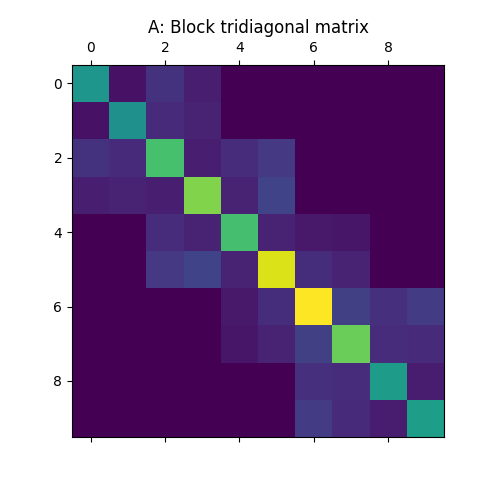

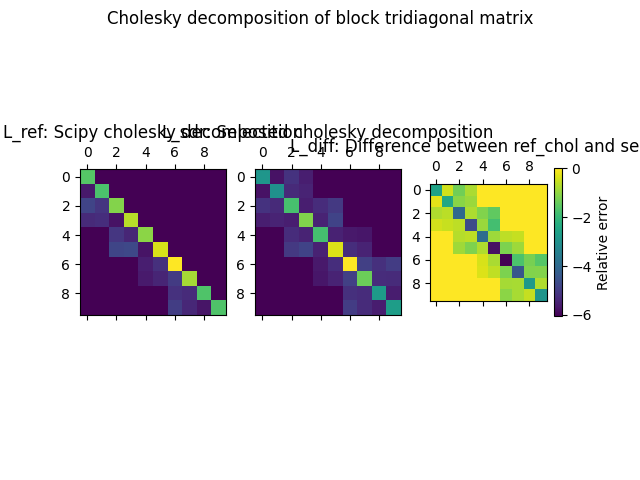

In [2]:
%matplotlib widget

from sdr.cholesky.cholesky_decompose import chol_dcmp_tridiag

nblocks = 5
blocksize = 2
symmetric = True
diagonal_dominant = True
seed = 63

A = matrix_generation.generate_blocktridiag(
    nblocks, blocksize, symmetric, diagonal_dominant, seed
)

plt.matshow(A)
plt.title("A: Block tridiagonal matrix")

# --- Decomposition ---
print(A[0:5,0:5])

fig, ax = plt.subplots(1, 3)
fig.suptitle("Cholesky decomposition of block tridiagonal matrix")
L_ref = la.cholesky(A, lower=True)
ax[0].set_title("L_ref: Scipy cholesky decomposition")
ax[0].matshow(L_ref)

L_sdr = chol_dcmp_tridiag(A, blocksize, overwrite=False)
ax[1].set_title("L_sdr: Selected cholesky decomposition")
ax[1].matshow(L_sdr)

L_diff = L_ref - L_sdr
ax[2].set_title("L_diff: Difference between ref_chol and sel_chol")
ax[2].matshow(L_diff)
fig.colorbar(ax[2].matshow(L_diff), ax=ax[2], label="Relative error", shrink=0.4)

print(A[0:5, 0:5])


## 2. Block tridiagonal arrowhead matrix

In [ ]:
%matplotlib widget

from sdr.cholesky.cholesky_decompose import chol_dcmp_tridiag_arrowhead

nblocks = 5
diag_blocksize = 3
arrow_blocksize = 2
symmetric = True
diagonal_dominant = True
seed = 63

A = matrix_generation.generate_blocktridiag_arrowhead(
    nblocks, diag_blocksize, arrow_blocksize, symmetric, diagonal_dominant, 
    seed
)

plt.matshow(A)
plt.title("A: Block tridiagonal arrowhead matrix")

# --- Decomposition ---

fig, ax = plt.subplots(1, 3)
fig.suptitle("Cholesky decomposition of block tridiagonal arrowhead matrix")
L_ref = la.cholesky(A, lower=True)
ax[0].set_title("L_ref: Scipy cholesky decomposition")
ax[0].matshow(L_ref)

L_sdr = chol_dcmp_tridiag_arrowhead(A, diag_blocksize, arrow_blocksize)
ax[1].set_title("L_sdr: Selected cholesky decomposition")
ax[1].matshow(L_sdr)

L_diff = L_ref - L_sdr
ax[2].set_title("L_diff: Difference between L_ref and L_sdr")
ax[2].matshow(L_diff)
fig.colorbar(ax[2].matshow(L_diff), ax=ax[2], label="Relative error", shrink=0.4)

## 3. Block n-diagonals matrix

In [ ]:
%matplotlib widget

from sdr.cholesky.cholesky_decompose import chol_dcmp_ndiags

nblocks = 6
ndiags = 7
blocksize = 2
symmetric = True
diagonal_dominant = True
seed = 63

A = matrix_generation.generate_block_ndiags(
    nblocks, ndiags, blocksize, symmetric, diagonal_dominant, seed
)

plt.matshow(A)
plt.title("A: Block {}-diagonals matrix".format(ndiags))
# --- Decomposition ---

fig, ax = plt.subplots(1, 3)
fig.suptitle("Cholesky decomposition of block {}-diagonals matrix".format(ndiags))
L_ref = la.cholesky(A, lower=True)
ax[0].set_title("L_ref: Scipy cholesky decomposition")
ax[0].matshow(L_ref)

L_sdr = chol_dcmp_ndiags(A, ndiags, blocksize)
ax[1].set_title("L_sdr: Selected cholesky decomposition")
ax[1].matshow(L_sdr)

L_diff = L_ref - L_sdr
ax[2].set_title("L_diff: Difference between L_ref and L_sdr")
ax[2].matshow(L_diff)
fig.colorbar(ax[2].matshow(L_diff), ax=ax[2], label="Relative error", shrink=0.4)

## 4. Block n-diagonals arrowhead matrix

In [ ]:
%matplotlib widget

from sdr.cholesky.cholesky_decompose import chol_dcmp_ndiags_arrowhead

nblocks = 7
ndiags = 5
diag_blocksize = 2
arrow_blocksize = 2
symmetric = True
diagonal_dominant = True
seed = 63

A = matrix_generation.generate_ndiags_arrowhead(
    nblocks, ndiags, diag_blocksize, arrow_blocksize, symmetric, 
    diagonal_dominant, seed
)

plt.matshow(A)
plt.title("A: Block {}-diagonals arrowhead matrix".format(ndiags))

# --- Decomposition ---

fig, ax = plt.subplots(1, 3)
fig.suptitle("Cholesky decomposition of block {}-diagonals arrowhead matrix".format(ndiags))
L_ref = la.cholesky(A, lower=True)
ax[0].set_title("L_ref: Scipy cholesky decomposition")
ax[0].matshow(L_ref)

L_sdr = chol_dcmp_ndiags_arrowhead(A, ndiags, diag_blocksize, arrow_blocksize)
ax[1].set_title("L_sdr: Selected cholesky decomposition")
ax[1].matshow(L_sdr)

L_diff = L_ref - L_sdr
ax[2].set_title("L_diff: Difference between L_ref and L_sdr")
ax[2].matshow(L_diff)
fig.colorbar(ax[2].matshow(L_diff), ax=ax[2], label="Relative error", shrink=0.4)